[View in Colaboratory](https://colab.research.google.com/github/gops75/dLclass/blob/master/s4/inkersDL_p1_1stDNN.ipynb)

In [1]:
!pip install keras

In [42]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


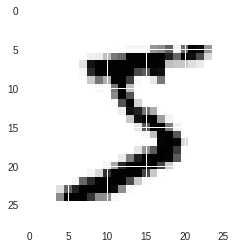

In [45]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [46]:
X_train.shape[0]

60000

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [49]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [51]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1)))
# This gives an output of 26 x 26 x 32, which feeds into the next layer as input
model.add(Convolution2D(20, 3, 3, activation='relu'))
# This yields 24 x 24 x 20
model.add(Convolution2D(10, 1, activation='relu'))
# This gives an output of 24 x 24 x 10
model.add(Convolution2D(10, 24))
# The final output from the above convolution is 1 x 1 x 10
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  


In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 20)        5780      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)        210       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 10)          57610     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 63,920
Trainable params: 63,920
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  512/60000 [..............................] - ETA: 22s - loss: 0.0010 - acc: 1.0000    

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


60000/60000 [==============================] - 21s 351us/step - loss: 0.0078 - acc: 0.9972
Epoch 2/10
57376/60000 [===========================>..] - ETA: 0s - loss: 0.0062 - acc: 0.9981

60000/60000 [==============================] - 21s 356us/step - loss: 0.0063 - acc: 0.9980
Epoch 3/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0057 - acc: 0.9983
Epoch 4/10
14624/60000 [======>.......................] - ETA: 15s - loss: 0.0056 - acc: 0.9983

60000/60000 [==============================] - 21s 349us/step - loss: 0.0059 - acc: 0.9981
Epoch 5/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0057 - acc: 0.9984
Epoch 6/10
 2272/60000 [>.............................] - ETA: 20s - loss: 0.0048 - acc: 0.9991

60000/60000 [==============================] - 21s 351us/step - loss: 0.0051 - acc: 0.9984
Epoch 7/10
58560/60000 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.9980

60000/60000 [==============================] - 21s 351us/step - loss: 0.0061 - acc: 0.9980
Epoch 8/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0040 - acc: 0.9988
Epoch 9/10
15008/60000 [======>.......................] - ETA: 15s - loss: 0.0031 - acc: 0.9991

60000/60000 [==============================] - 21s 350us/step - loss: 0.0042 - acc: 0.9987
Epoch 10/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0034 - acc: 0.9989


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [60]:
print(score)

[0.10182456865962997, 0.9839]


In [0]:
y_pred = model.predict(X_test)

In [62]:
print(y_pred[:9])
print(y_test[:9])

[[4.26509574e-33 6.76806448e-32 4.29295025e-22 1.05686442e-13
  0.00000000e+00 5.55992623e-28 0.00000000e+00 1.00000000e+00
  2.55499189e-23 5.36036544e-21]
 [9.90729807e-12 5.54028134e-12 1.00000000e+00 7.86912073e-15
  4.83532446e-27 1.74380437e-21 3.85324342e-11 1.25847658e-27
  2.56817577e-14 1.94839291e-20]
 [1.59697412e-11 9.99999523e-01 8.23687576e-11 2.71466521e-14
  2.83554755e-07 3.32590483e-11 1.07170681e-13 1.10392811e-07
  7.11023702e-08 2.75261212e-14]
 [1.00000000e+00 2.29266808e-29 3.00025290e-17 8.56084991e-19
  4.58393282e-28 8.37261220e-22 9.30923175e-15 8.76021686e-20
  2.29573175e-21 1.08518635e-17]
 [2.75645221e-19 5.46678684e-25 2.96094574e-18 5.75893896e-19
  1.00000000e+00 1.62023085e-19 2.26974745e-21 3.28190369e-14
  1.79548695e-10 2.37871678e-09]
 [8.23146279e-14 9.99999762e-01 2.13080144e-11 5.71351649e-17
  3.74715992e-09 1.92489741e-15 6.83546820e-18 2.63811131e-07
  1.42600443e-09 9.88014382e-15]
 [2.00682316e-36 1.47175532e-22 4.77032087e-20 2.52766750e

In [64]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_9': <keras.layers.convolutional.Conv2D object at 0x7f3b515878d0>, 'conv2d_10': <keras.layers.convolutional.Conv2D object at 0x7f3b51587c50>, 'conv2d_11': <keras.layers.convolutional.Conv2D object at 0x7f3b515b6940>, 'conv2d_12': <keras.layers.convolutional.Conv2D object at 0x7f3b51605668>, 'flatten_3': <keras.layers.core.Flatten object at 0x7f3b51020be0>, 'activation_3': <keras.layers.core.Activation object at 0x7f3b50ab9fd0>}


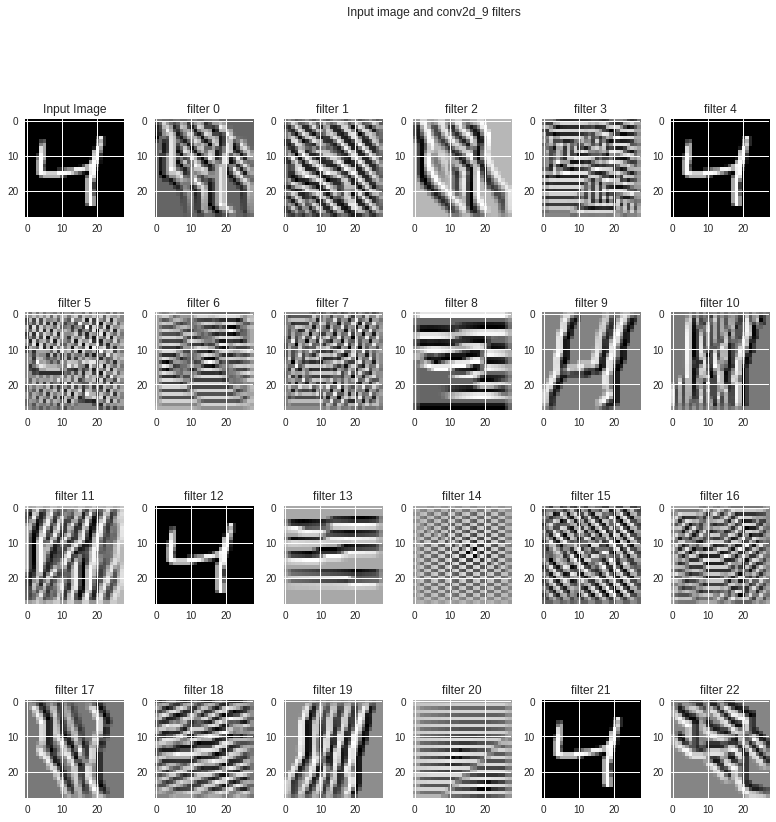

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
  # normalize tensor: center on 0., sensure std is 0.1
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  # clip to [0, 1]
  x += 0.5
  x = np.clip(x, 0, 1)
  
  # convert to RGB array
  x *= 255
  #x = x.transpose((1, 2, 0))
  x = np.clip(x, 0, 255).astype('uint8')
  return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_1'):
  layer_output = layer_dict[layer_name].output
  img_ascs = list()
  for filter_index in range(layer_output.shape[3]):
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # this function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # step size for gradient ascent
    step = 5.
    
    img_asc = np.array(img)
    # run gradient ascent for 20 steps
    for i in range(20):
      loss_value, grads_value = iterate([img_asc])
      img_asc += grads_value * step
      
    img_asc = img_asc[0]
    img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
    
  if layer_output.shape[3] >= 35:
    plot_x, plot_y = 6, 6
  elif layer_output.shape[3] >= 23:
    plot_x, plot_y = 4, 6
  elif layer_output.shape[3] >= 11:
    plot_x, plot_y = 2, 6
  else:
    plot_x, plot_y = 1, 2
  
  fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
  ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
  ax[0, 0].set_title('Input Image')
  fig.suptitle('Input image and %s filters' % (layer_name, ))
  fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
  for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
    if x == 0 and y == 0:
      continue
    ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
    ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))
    
vis_img_in_filter()

    
 